In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [52]:
df = pd.read_excel("./cattle_data.xlsx")
df.dropna(inplace=True)
df.head()

,Date,Last Price,Open Interest,SMAVG (15)
0,2025-11-21,214.775,116399,96331.4688
1,2025-11-20,215.400,114804,93606.6641
2,2025-11-19,217.250,112995,90925.1328
3,2025-11-18,220.850,111970,88360.9297
4,2025-11-17,221.775,109756,85913.3359


In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()
df["Log Return"] = np.log(df["Last Price"]).diff()
df.dropna(inplace=True)

In [54]:
df

,Last Price,Open Interest,SMAVG (15),Log Return
Date,,,,
2024-11-25,187.475,2083,1581.6666,0.001334
2024-11-26,187.375,2124,1639.4667,-0.000534
2024-11-27,187.950,2200,1702.6000,0.003064
2024-11-29,188.375,2209,1766.2000,0.002259
2024-12-02,188.400,2245,1832.4667,0.000133
...,...,...,...,...
2025-11-17,221.775,109756,85913.3359,0.010197
2025-11-18,220.850,111970,88360.9297,-0.004180
2025-11-19,217.250,112995,90925.1328,-0.016435


In [ ]:
hedge_exercise_df = df.tail(10)

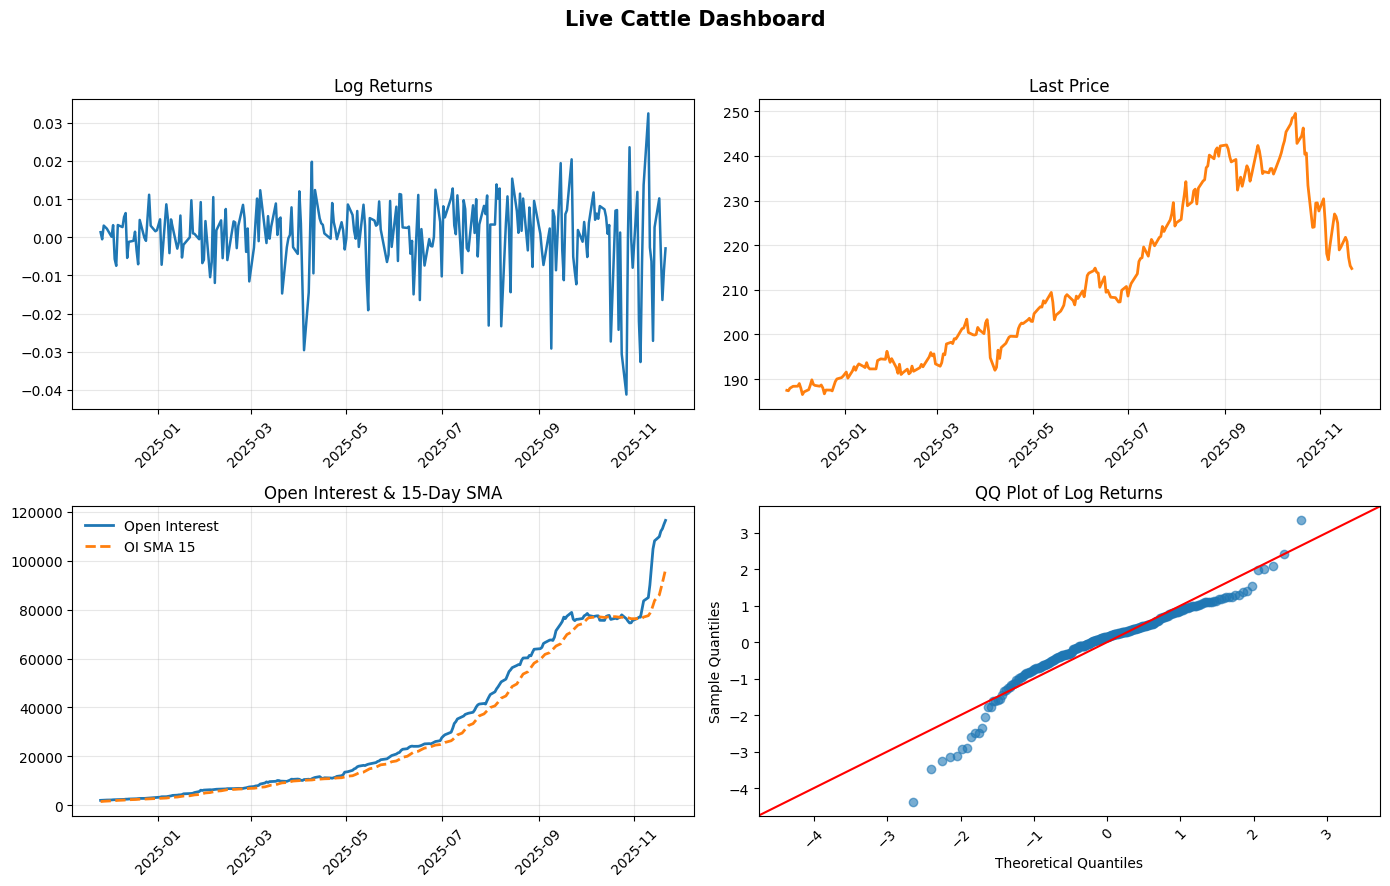

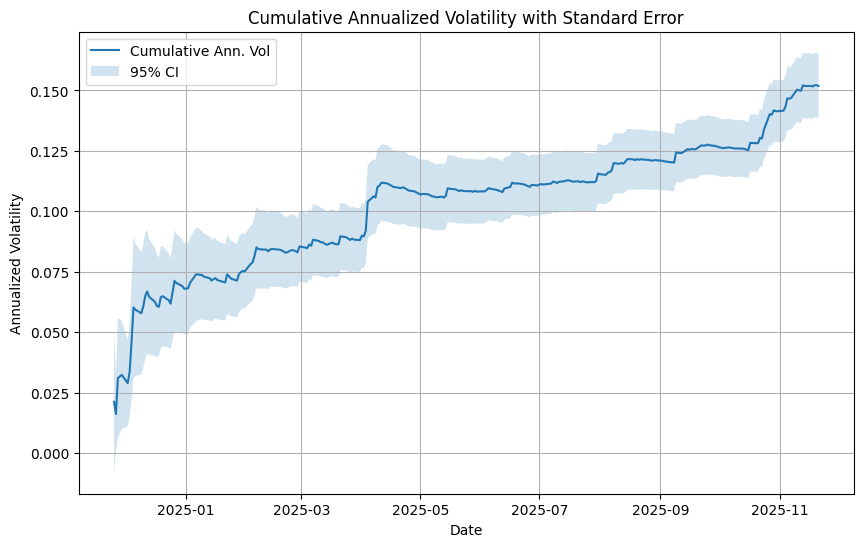

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
(ax1, ax2), (ax3, ax4) = axes

ax1.plot(df.index, df["Log Return"], linewidth=1.8, color="tab:blue")
ax1.set_title("Log Returns")
ax1.grid(True, alpha=0.3)

ax2.plot(df.index, df["Last Price"], linewidth=2, color="tab:orange")
ax2.set_title("Last Price")
ax2.grid(True, alpha=0.3)

ax3.plot(df.index, df["Open Interest"], linewidth=2, label="Open Interest")
ax3.plot(df.index, df["SMAVG (15)"], linestyle="--", linewidth=2, label="OI SMA 15")
ax3.set_title("Open Interest & 15-Day SMA")
ax3.legend(frameon=False)
ax3.grid(True, alpha=0.3)

sm.qqplot(df["Log Return"], line='45', fit=True, ax=ax4, marker='o', alpha=0.6)
ax4.set_title("QQ Plot of Log Returns")

for ax in axes.flatten():
    ax.tick_params(axis="x", rotation=45)

fig.suptitle("Live Cattle Dashboard", fontsize=15, fontweight="bold", y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

df["N"] = np.arange(1, len(df) + 1)
df["CumVar"] = (df["Log Return"]**2).expanding().mean()
df["CumAnnVol"] = np.sqrt(df["CumVar"] * 252)

df["Vol_SE"] = df["CumAnnVol"] / np.sqrt(2 * df["N"])

df["Vol_CI_Upper"] = df["CumAnnVol"] + 1.96 * df["Vol_SE"]
df["Vol_CI_Lower"] = df["CumAnnVol"] - 1.96 * df["Vol_SE"]

# --- Plot ---
plt.figure(figsize=(10,6))
plt.plot(df.index, df["CumAnnVol"], label="Cumulative Ann. Vol")
plt.fill_between(df.index, df["Vol_CI_Lower"], df["Vol_CI_Upper"], alpha=0.2, label="95% CI")
plt.title("Cumulative Annualized Volatility with Standard Error")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility")
plt.legend()
plt.grid(True)
plt.show()




In [57]:
daily_vol = df['Log Return'].std()
annual_vol = daily_vol * np.sqrt(252)

n = len(df['Log Return'])
se_vol = annual_vol / np.sqrt(2 * (n - 1))

summary = pd.DataFrame({
    "Metric": ["Daily Volatility", "Annualized Volatility", "Standard Error"],
    "Value": [daily_vol, annual_vol, se_vol]
})

print("Log Returns Table:")
print(df[['Last Price', 'Log Return']].to_string(index=False))
print("\nVolatility Summary:")
print(summary.to_string(index=False, float_format="{:.6f}".format))

Log Returns Table:
 Last Price  Log Return
    187.475    0.001334
    187.375   -0.000534
    187.950    0.003064
    188.375    0.002259
    188.400    0.000133
    189.000    0.003180
    187.925   -0.005704
    186.525   -0.007478
    187.125    0.003212
    187.625    0.002668
    188.625    0.005316
    189.825    0.006342
    188.800   -0.005414
    188.575   -0.001192
    188.400   -0.000928
    188.675    0.001459
    188.025   -0.003451
    186.700   -0.007072
    187.550    0.004542
    187.525   -0.000133
    187.350   -0.000934
    189.450    0.011147
    190.025    0.003031
    190.325    0.001577
    190.675    0.001837
    191.575    0.004709
    190.200   -0.007203
    191.850    0.008638
    192.775    0.004810
    191.975   -0.004159
    192.875    0.004677
    193.400    0.002718
    192.825   -0.002978
    192.575   -0.001297
    193.675    0.005696
    192.650   -0.005306
    192.275   -0.001948
    192.275    0.000000
    194.150    0.009704
    194.350    0.0010

In [58]:
df = pd.read_csv("live_cattle_options.csv", index_col=0)
df

,Strike,Dec_Call,Dec_Put,Jan_Call,Jan_Put,Feb_Call,Feb_Put
0,186,19.425,0.450,20.625,1.750,22.500,3.075
1,187,18.450,0.475,19.800,1.900,21.700,3.275
2,188,17.475,0.500,18.950,2.050,20.925,3.475
3,189,16.500,0.525,18.125,2.225,20.175,3.700
4,190,15.550,0.575,17.325,2.425,19.400,3.950
5,191,14.625,0.625,16.525,2.625,18.650,4.200
6,192,13.700,0.725,15.750,2.850,17.925,4.450
7,193,12.850,0.850,14.975,3.075,17.225,4.750
8,194,12.000,1.025,14.225,3.325,16.525,5.025
9,195,11.175,1.175,13.500,3.575,15.850,5.350


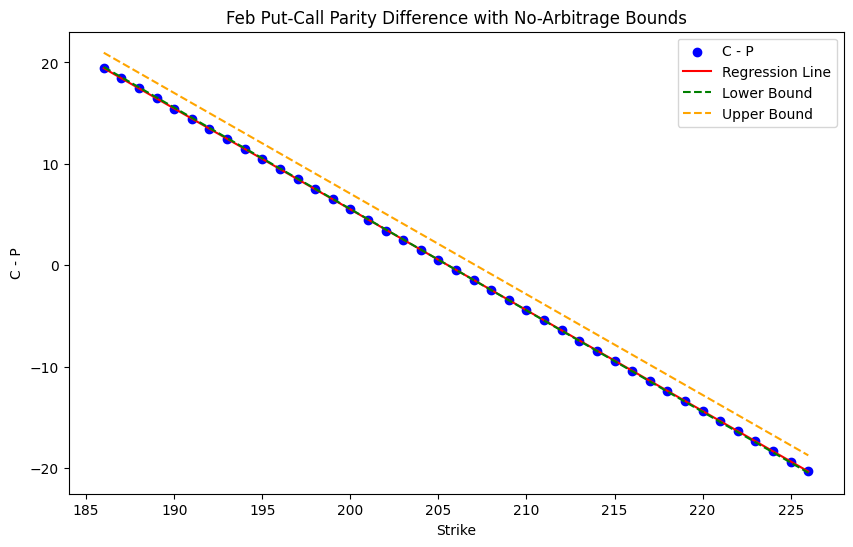

In [59]:
S0 = 205.55
T = 49/252
r = 0.0391

df['Feb_C_minus_P'] = df['Feb_Call'] - df['Feb_Put']

x = df['Strike']
y = df['Feb_C_minus_P']

lower_bound = S0 - x
upper_bound = S0 - x * np.exp(-r * T)

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue', label='C - P')

coeffs = np.polyfit(x, y, 1)
reg_line = np.poly1d(coeffs)
plt.plot(x, reg_line(x), color='red', label='Regression Line')

plt.plot(x, lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.plot(x, upper_bound, color='orange', linestyle='--', label='Upper Bound')

plt.xlabel('Strike')
plt.ylabel('C - P')
plt.title('Feb Put-Call Parity Difference with No-Arbitrage Bounds')
plt.legend()
plt.show()

In [60]:
from scipy.stats import norm

def binomial_option_pricing(S0, K, r, T, sigma, N, option_type="call", american=False):
    """
    Binomial option pricing model (function skeleton).
    
    Parameters:
        S0 : float   - current stock price
        K  : float   - strike price
        r  : float   - risk-free interest rate (annual)
        T  : float   - time to maturity (in years)
        sigma : float - volatility (annual)
        N : int      - number of steps
        option_type : str - 'call' or 'put'
        american : bool - True for American option, False for European
    """

    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_tree = [[0 for _ in range(i + 1)] for i in range(N + 1)]
    stock_tree[0][0] = S0

    # builds the stock price tree, applies u or d for each time step at each node
    for i in range(1, N + 1):
        for j in range(i + 1):
            if j == 0:
                stock_tree[i][j] = stock_tree[i-1][j] * d
            else:
                stock_tree[i][j] = stock_tree[i-1][j-1] * u
    
    # option tree 
    option_tree = [[0 for _ in range(i + 1)] for i in range(N + 1)]

    # fill out the leaves of the option tree
    for j in range(N+1):
        S_T =  stock_tree[N][j]
        if option_type == "call":
            option_tree[N][j] = max(S_T - K, 0)
        else:
            option_tree[N][j] = max(K - S_T, 0)
    
    # backward induction
    discount =  np.exp(-r * dt)
    for i in range(N-1, -1, -1):
        for j in range(i + 1):
            continuation_value =  discount * (p * option_tree[i + 1][j + 1] +  (1 -p) * option_tree[i + 1][j])

            if american:
                S =  stock_tree[i][j]
                exercise = max(S - K, 0) if option_type == "call" else max(K - S, 0)
                option_tree[i][j] = max(continuation_value, exercise)
            else:
                option_tree[i][j] = continuation_value
    
    price = option_tree[0][0]

    delta = (option_tree[1][1] - option_tree[1][0]) / (stock_tree[1][1] - stock_tree[1][0])

    delta_up = (option_tree[2][2] - option_tree[2][1]) / (stock_tree[2][2] - stock_tree[2][1])
    delta_down = (option_tree[2][1] - option_tree[2][0]) / (stock_tree[2][1] - stock_tree[2][0])
    gamma = (delta_up - delta_down) / ((stock_tree[2][2] - stock_tree[2][0]) / 2)

    return price, delta, gamma

def black_scholes_option_pricing(S, K, r, T, sigma, option_type = "call"):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * norm.cdf(d1) - np.exp (-r * T) * K * norm.cdf(d2) if option_type == "call" else np.exp(-r * T) * K * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

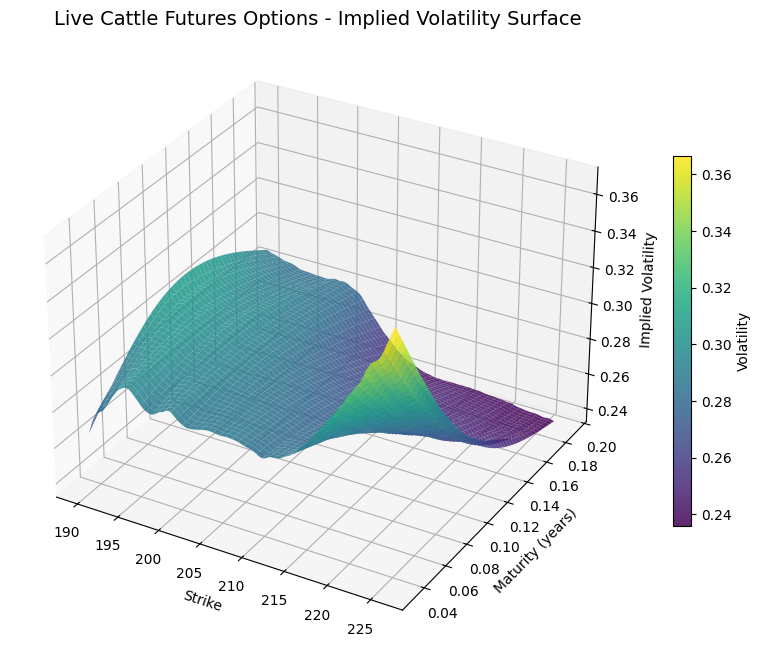

In [61]:
from scipy.optimize import brentq
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

S = 205.55
option_info = [(0.0403, 8/252, "Dec"), (0.0399, 24/252, "Jan"), (0.0391, 48/252, "Feb")]

def black76(F, K, r, T, sigma, option_type="call"):
    d1 = (np.log(F/K) + 0.5*sigma**2*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == "call":
        return np.exp(-r*T)*(F*norm.cdf(d1) - K*norm.cdf(d2))
    else:
        return np.exp(-r*T)*(K*norm.cdf(-d2) - F*norm.cdf(-d1))

def price_difference(sigma, S0, K, r, T, market_price, option_type="call"):
    return black76(S0, K, r, T, sigma, option_type) - market_price

def implied_vol(S0, K, r, T, market_price, option_type="call"):
    try:
        return brentq(price_difference, 0.0001, 5.0,
                      args=(S0, K, r, T, market_price, option_type))
    except ValueError:
        return np.nan
    
for r, T, m in option_info:
    df[f"{m}_Calls_Implied_Vol"] = df.apply(
        lambda row: implied_vol(S, row['Strike'], r, T, row[f'{m}_Call'], 'call'),
        axis=1
    )

    df[f'{m}_Puts_Implied_Vol'] = df.apply(
        lambda row: implied_vol(S, row['Strike'], r, T, row[f'{m}_Put'], 'put'),
        axis=1
    )

plot_df = df.dropna()
expiry_map = {
    "Dec": 8/252,
    "Jan": 24/252,
    "Feb": 48/252
}

def build_vol_surface_df(df):
    rows = []

    for month, T in expiry_map.items():
        call_col = f"{month}_Calls_Implied_Vol"
        put_col = f"{month}_Puts_Implied_Vol"

        mid_vol = 0.5 * (df[call_col] + df[put_col])

        for strike, vol in zip(df["Strike"], mid_vol):
            if not np.isnan(vol):
                rows.append([strike, T, vol])

    surf_df = pd.DataFrame(rows, columns=["Strike", "T", "Vol"])
    return surf_df


surf_df = build_vol_surface_df(plot_df)


K_vals = np.linspace(surf_df["Strike"].min(), surf_df["Strike"].max(), 200)
T_vals = np.linspace(surf_df["T"].min(), surf_df["T"].max(), 200)

K_grid, T_grid = np.meshgrid(K_vals, T_vals)

V_grid = griddata(
    points=(surf_df["Strike"], surf_df["T"]),
    values=surf_df["Vol"],
    xi=(K_grid, T_grid),
    method="cubic"
)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    K_grid,
    T_grid,
    V_grid,
    cmap="viridis",
    linewidth=0,
    antialiased=True,
    alpha=0.85
)

ax.set_title("Live Cattle Futures Options - Implied Volatility Surface", fontsize=14)
ax.set_xlabel("Strike")
ax.set_ylabel("Maturity (years)")
ax.set_zlabel("Implied Volatility")

fig.colorbar(surf, shrink=0.6, label="Volatility")

plt.show()

In [62]:
df

,Strike,Dec_Call,Dec_Put,Jan_Call,Jan_Put,Feb_Call,Feb_Put,Feb_C_minus_P,Dec_Calls_Implied_Vol,Dec_Puts_Implied_Vol,Jan_Calls_Implied_Vol,Jan_Puts_Implied_Vol,Feb_Calls_Implied_Vol,Feb_Puts_Implied_Vol
0,186,19.425,0.450,20.625,1.750,22.500,3.075,19.425,NaN,0.388596,0.289432,0.332636,0.293694,0.292887
1,187,18.450,0.475,19.800,1.900,21.700,3.275,18.425,NaN,0.377269,0.291143,0.330439,0.291778,0.291285
2,188,17.475,0.500,18.950,2.050,20.925,3.475,17.450,NaN,0.365502,0.289969,0.327576,0.290427,0.289284
3,189,16.500,0.525,18.125,2.225,20.175,3.700,16.475,NaN,0.353305,0.289571,0.325563,0.289579,0.287824
4,190,15.550,0.575,17.325,2.425,19.400,3.950,15.450,0.186740,0.344772,0.289779,0.324265,0.287394,0.286844
5,191,14.625,0.625,16.525,2.625,18.650,4.200,14.450,0.220674,0.335343,0.289012,0.322211,0.285703,0.285426
6,192,13.700,0.725,15.750,2.850,17.925,4.450,13.475,0.231442,0.332065,0.288747,0.320756,0.284456,0.283589
7,193,12.850,0.850,14.975,3.075,17.225,4.750,12.475,0.250252,0.330166,0.287562,0.318551,0.283609,0.283009
8,194,12.000,1.025,14.225,3.325,16.525,5.025,11.500,0.259367,0.331978,0.286799,0.316856,0.282316,0.281158
9,195,11.175,1.175,13.500,3.575,15.850,5.350,10.500,0.266427,0.328544,0.286376,0.314414,0.281387,0.280489


In [63]:
S = 205.55
T = 48/252
r = 0.0391

from collections import defaultdict

K = list(range(203, 209))

columns = ["Strike", "Steps", "Call_Price", "Call_Delta", "Call_Gamma",
           "Put_Price", "Put_Delta", "Put_Gamma", "Control_Variate"]
option_info = pd.DataFrame(columns=columns)

for k in K:
    for n in range(2, 200):
        call_price, call_delta, call_gamma = binomial_option_pricing(S, k, 0, T, df.loc[df["Strike"] == k, "Feb_Calls_Implied_Vol"].values[0], n, option_type="call", american=True)

        black_put_price = black76(S, k, r, T, df.loc[df["Strike"] == k, "Feb_Puts_Implied_Vol"].values[0], option_type="put")
        euro_put_price, euro_put_delta, euro_put_gamma = binomial_option_pricing(S, k, 0, T, df.loc[df["Strike"] == k, "Feb_Puts_Implied_Vol"].values[0], n, option_type="put", american=False)
        amer_put_price, amer_put_delta, amer_put_gamma = binomial_option_pricing(S, k, 0, T, df.loc[df["Strike"] == k, "Feb_Puts_Implied_Vol"].values[0], n, option_type="put", american=True)
        control_variate = black_put_price - euro_put_price
        adjusted_amer_put_price = amer_put_price - control_variate
        option_info = pd.concat([
            option_info,
            pd.DataFrame([{
                "Strike": k,
                "Steps": n,
                "Call_Price": call_price,
                "Call_Delta": call_delta,
                "Call_Gamma": call_gamma,
                "Put_Price": adjusted_amer_put_price,
                "Put_Delta": amer_put_delta,
                "Put_Gamma": amer_put_gamma,
                "Control_Variate": control_variate
            }])
        ], ignore_index=True)

option_info

/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_28339/38286426.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  option_info = pd.concat([


,Strike,Steps,Call_Price,Call_Delta,Call_Gamma,Put_Price,Put_Delta,Put_Gamma,Control_Variate
0,203,2,10.398854,0.559581,0.026763,7.408621,-0.440430,0.026747,0.445689
1,203,3,11.667971,0.571035,0.017729,9.949305,-0.428978,0.017718,-0.824652
2,203,4,10.754604,0.562703,0.019403,8.120784,-0.437309,0.019391,0.089608
3,203,5,11.338723,0.568785,0.017183,9.290387,-0.431228,0.017172,-0.495194
4,203,6,10.860688,0.563774,0.018015,8.333191,-0.436237,0.018004,-0.016596
...,...,...,...,...,...,...,...,...,...
1183,208,195,7.688424,0.477435,0.018079,10.213143,-0.522616,0.018093,-0.081571
1184,208,196,7.686544,0.477385,0.018082,10.209278,-0.522667,0.018096,-0.079639
1185,208,197,7.688519,0.477435,0.018078,10.213332,-0.522615,0.018092,-0.081666
1186,208,198,7.686307,0.477384,0.018082,10.208803,-0.522668,0.018097,-0.079401


In [64]:
call_market_price = [10.825, 10.125, 9.425, 8.775, 8.175, 7.625]

summary = option_info.groupby("Strike")["Call_Price"].agg(
    Final_Price=lambda x: x.iloc[-1],
    Min_Price="min",
    Max_Price="max",
    Mean_Price="mean"
).reset_index()
print(summary)

# plt.figure(figsize=(10,6))

# for i, strike in enumerate(call_df.columns):
#     prices = call_df[strike].values
#     plt.figure(figsize=(10,6))
#     plt.axhline(y=call_market_price[i], color='red', linestyle='--', linewidth=2, label=f"Market Price {call_market_price[i]}")
#     plt.plot(call_df.index, prices, label=f"Strike {strike}")
#     plt.xlabel("Binomial Steps (N)")
#     plt.ylabel("Option Price")
#     plt.title("American Call Option Price Evolution")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

   Strike  Final_Price  Min_Price  Max_Price  Mean_Price
0     203    10.911738  10.398854  11.667971   10.924549
1     204    10.192211   9.497190  10.981774   10.217928
2     205     9.504413   8.581390  10.278311    9.504530
3     206     8.850193   7.919933   9.611224    8.847959
4     207     8.228664   7.562001   8.979555    8.252513
5     208     7.688609   7.232566   8.382747    7.699464


In [65]:
put_market_price = [8.3, 8.575, 8.875, 9.225, 9.6, 10.05]
summary = option_info.groupby("Strike")["Put_Price"].agg(
    Final_Price=lambda x: x.iloc[-1],
    Min_Price="min",
    Max_Price="max",
    Mean_Price="mean"
).reset_index()
print(summary)

# for i, strike in enumerate(put_df.columns):
#     fig, ax1 = plt.subplots(figsize=(10,6))

#     ax1.plot(put_df.index, put_df[strike].values, color='blue', label='American Put (CV adjusted)')
#     ax1.axhline(y=put_market_price[i], color='red', linewidth=2, label=f'Market Put Price {put_market_price[i]}')
#     ax1.set_xlabel("Binomial Steps (N)")
#     ax1.set_ylabel("American Put Price", color='blue')
#     ax1.tick_params(axis='y', labelcolor='blue')

#     ax2 = ax1.twinx()
#     ax2.plot(cv_df.index, cv_df[strike].values, color='orange', linestyle='--', label='Control Variate')
#     ax2.set_ylabel("Control Variate Value", color='orange')
#     ax2.tick_params(axis='y', labelcolor='orange')

#     lines_1, labels_1 = ax1.get_legend_handles_labels()
#     lines_2, labels_2 = ax2.get_legend_handles_labels()
#     ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

#     plt.title(f"American Put Price & Control Variate Evolution - Strike {strike}")
#     plt.grid(True)
#     plt.show()


   Strike  Final_Price  Min_Price  Max_Price  Mean_Price
0     203     8.435686   7.408621   9.949305    8.461362
1     204     8.686168   7.298800  10.263355    8.737640
2     205     9.025590   7.180490  10.572699    9.025837
3     206     9.382124   7.520829  10.904749    9.377645
4     207     9.728537   8.398522  11.227914    9.776278
5     208    10.213511   9.302880  11.600492   10.235166


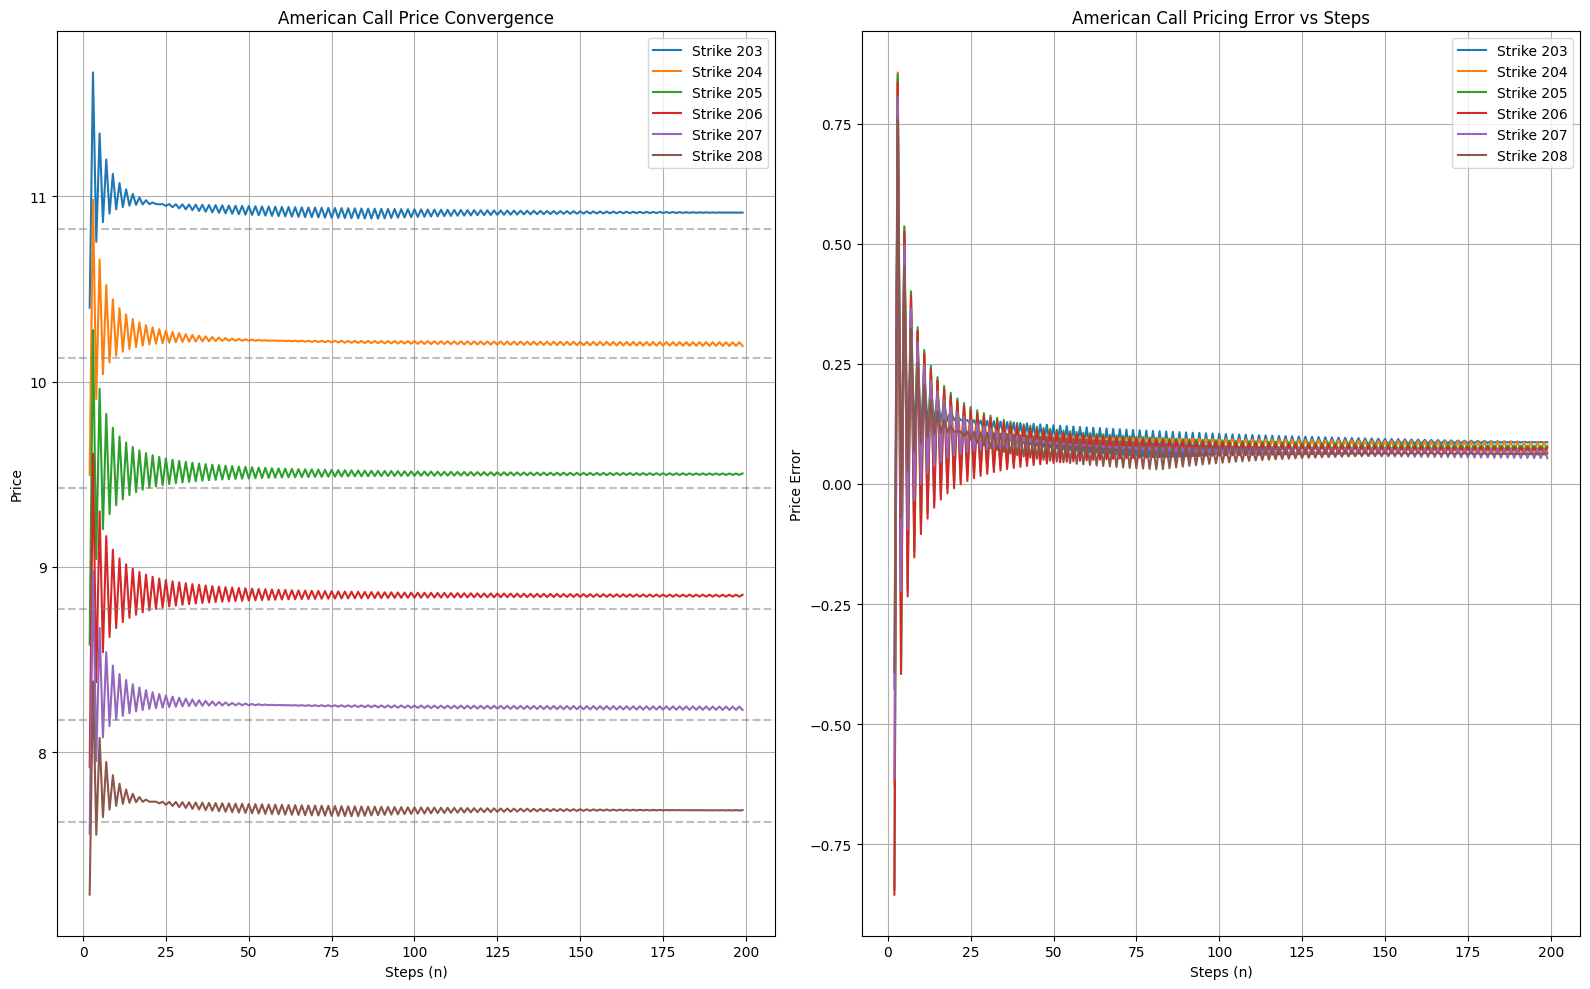

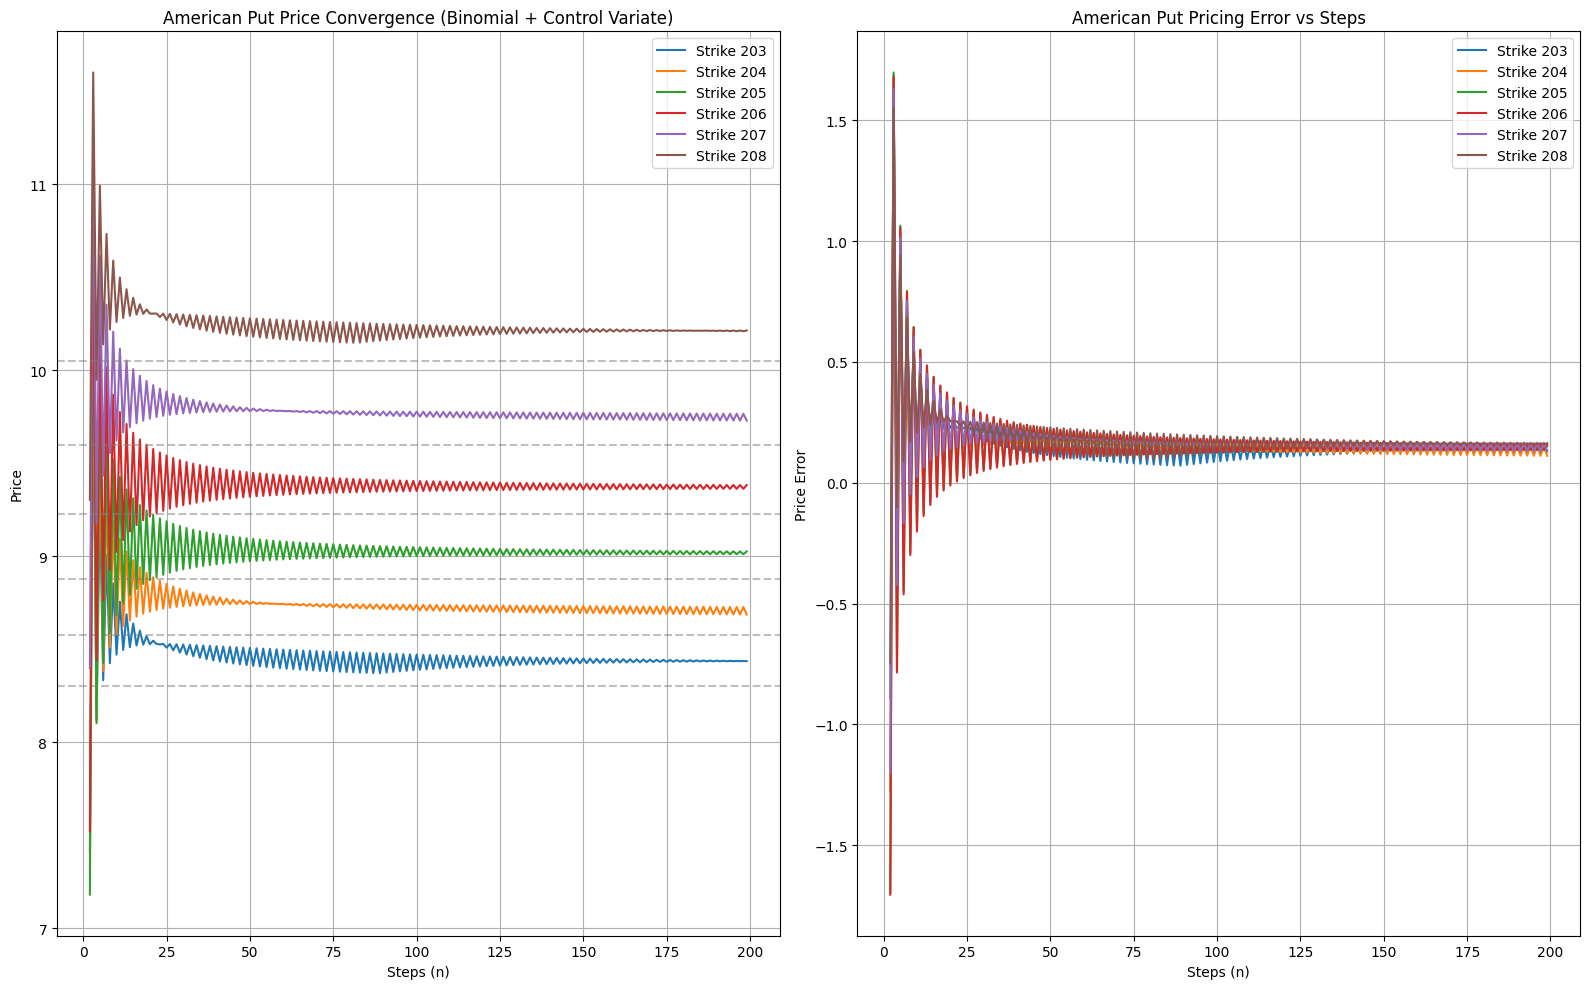

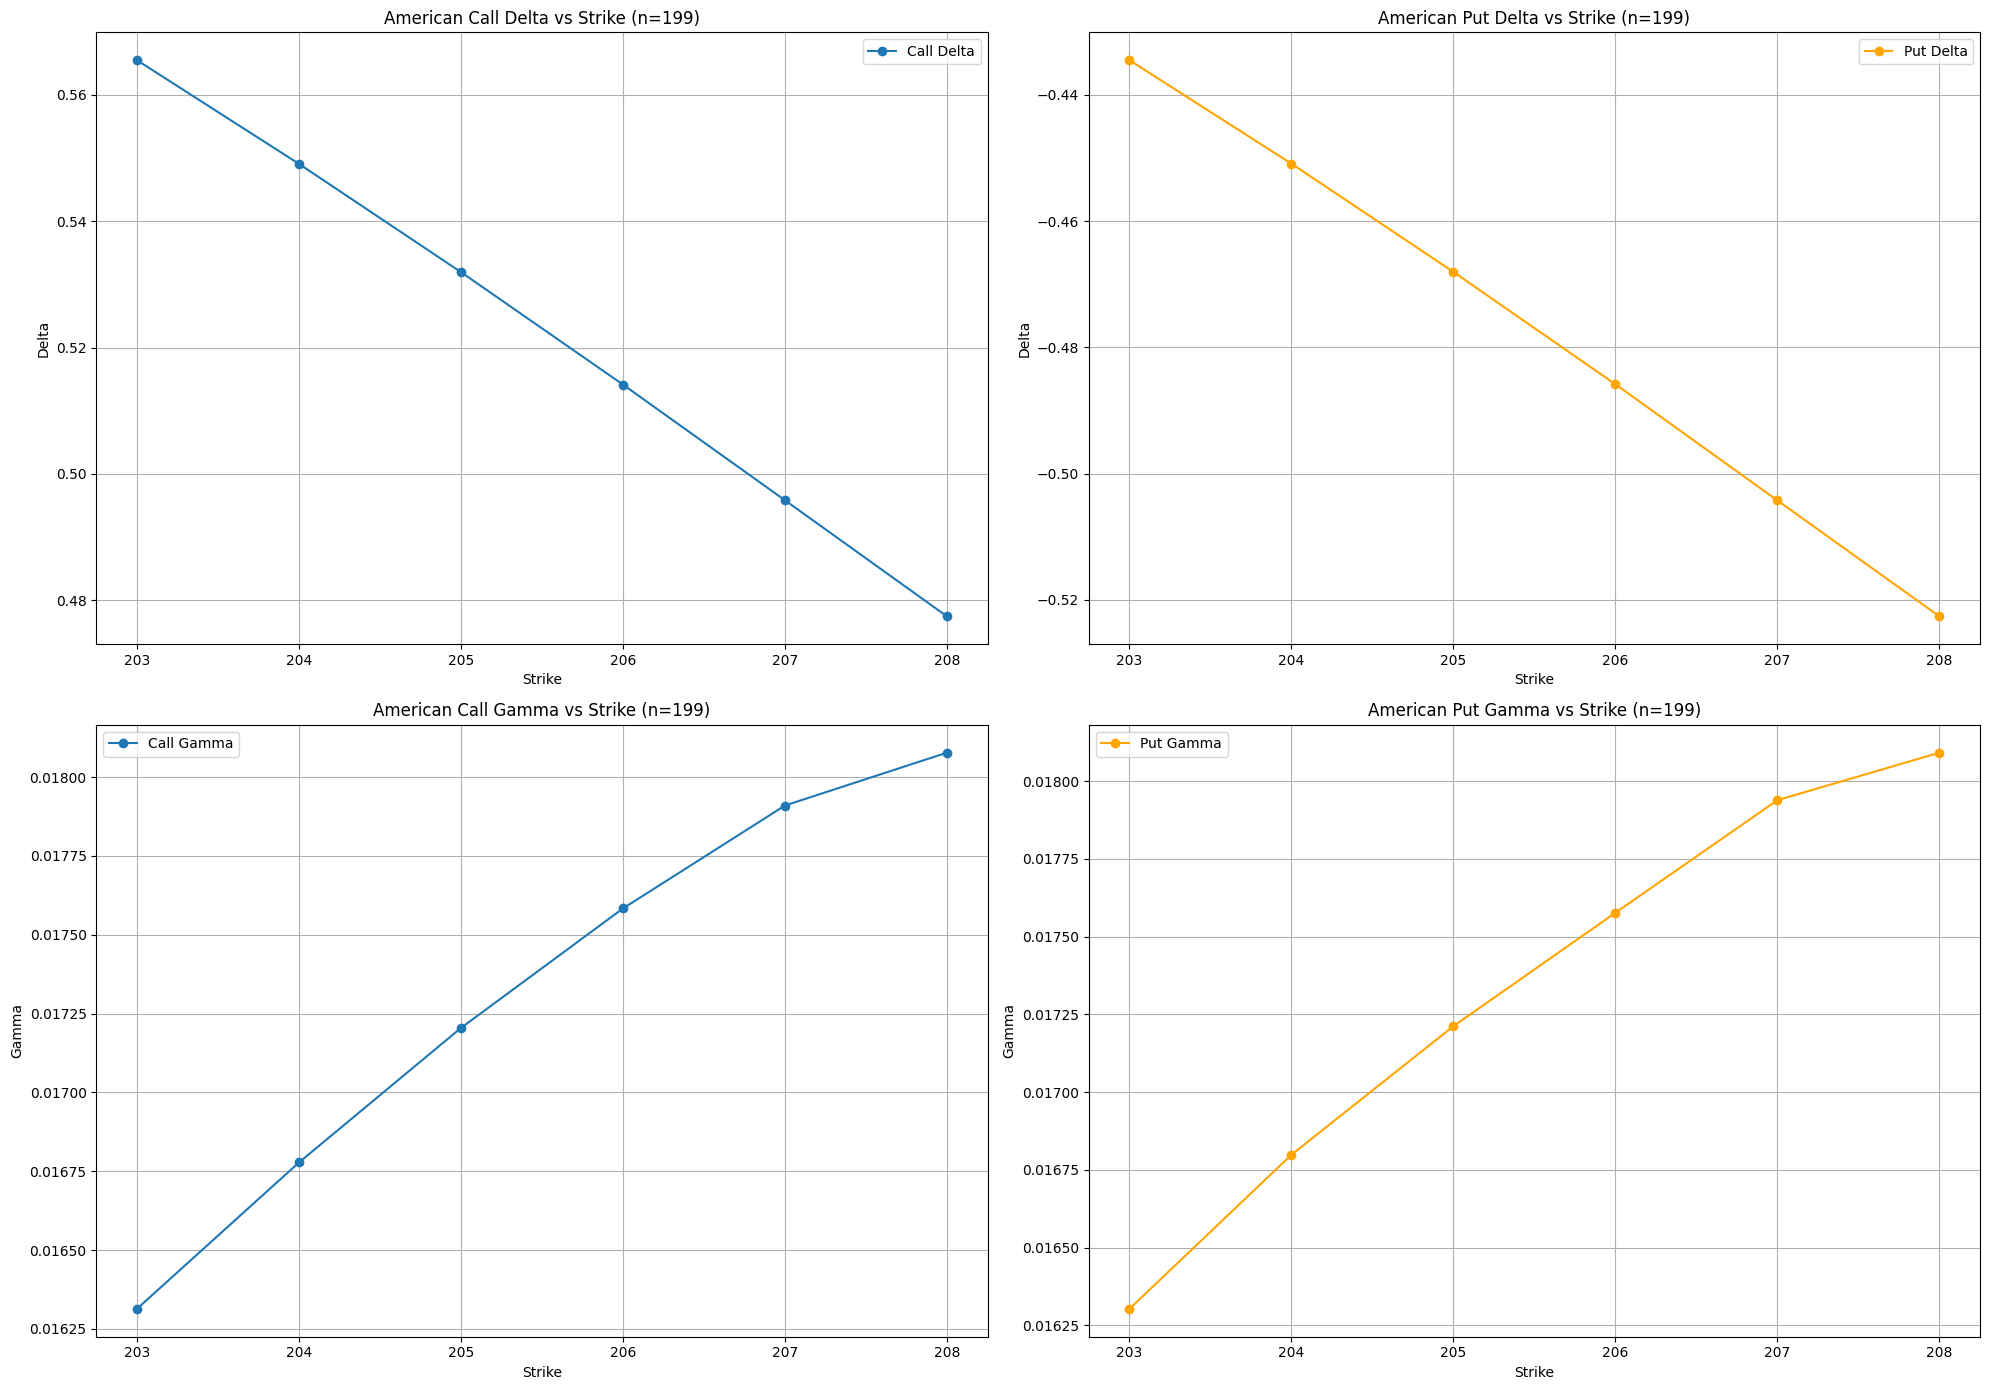

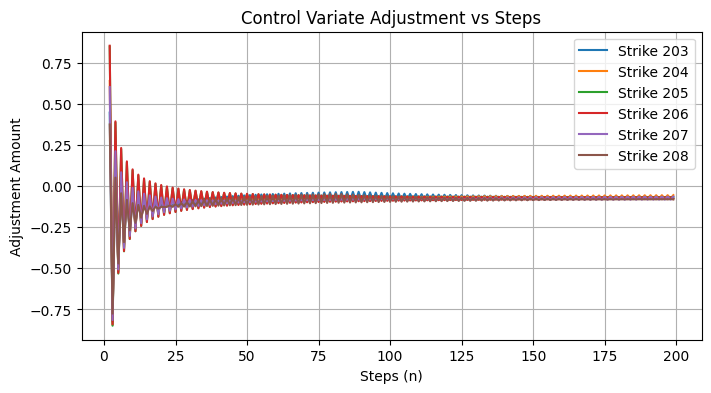

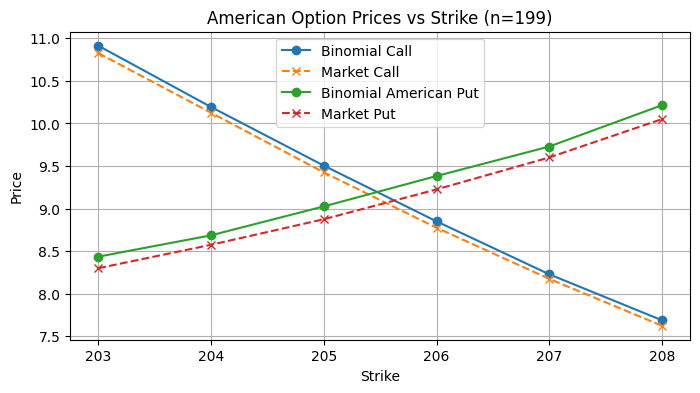

In [66]:
call_df = option_info.pivot(index="Steps", columns="Strike", values="Call_Price")
put_df = option_info.pivot(index="Steps", columns="Strike", values="Put_Price")
call_delta_df = option_info.pivot(index="Steps", columns="Strike", values="Call_Delta")
put_delta_df = option_info.pivot(index="Steps", columns="Strike", values="Put_Delta")
call_gamma_df = option_info.pivot(index="Steps", columns="Strike", values="Call_Gamma")
put_gamma_df = option_info.pivot(index="Steps", columns="Strike", values="Put_Gamma")
cv_df = option_info.pivot(index="Steps", columns="Strike", values="Control_Variate")

n_max = option_info["Steps"].max()

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

for k in K:
    axes[0].plot(call_df.index, call_df[k], label=f'Strike {k}')
    axes[0].axhline(y=call_market_price[K.index(k)], color='grey', linestyle='--', alpha=0.5)
axes[0].set_title("American Call Price Convergence")
axes[0].set_xlabel("Steps (n)")
axes[0].set_ylabel("Price")
axes[0].legend()
axes[0].grid(True)

for k in K:
    axes[1].plot(call_df.index, call_df[k] - call_market_price[K.index(k)], label=f'Strike {k}')
axes[1].set_title("American Call Pricing Error vs Steps")
axes[1].set_xlabel("Steps (n)")
axes[1].set_ylabel("Price Error")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

for k in K:
    axes[0].plot(put_df.index, put_df[k], label=f'Strike {k}')
    axes[0].axhline(y=put_market_price[K.index(k)], color='grey', linestyle='--', alpha=0.5)
axes[0].set_title("American Put Price Convergence (Binomial + Control Variate)")
axes[0].set_xlabel("Steps (n)")
axes[0].set_ylabel("Price")
axes[0].legend()
axes[0].grid(True)

for k in K:
    axes[1].plot(put_df.index, put_df[k] - put_market_price[K.index(k)], label=f'Strike {k}')
axes[1].set_title("American Put Pricing Error vs Steps")
axes[1].set_xlabel("Steps (n)")
axes[1].set_ylabel("Price Error")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(20, 14))

axes[0,0].plot(K, [call_delta_df[k][n_max] for k in K], marker='o', label='Call Delta')
axes[0,0].set_title(f"American Call Delta vs Strike (n={n_max})")
axes[0,0].set_xlabel("Strike")
axes[0,0].set_ylabel("Delta")
axes[0,0].grid(True)
axes[0,0].legend()

axes[0,1].plot(K, [put_delta_df[k][n_max] for k in K], marker='o', color='orange', label='Put Delta')
axes[0,1].set_title(f"American Put Delta vs Strike (n={n_max})")
axes[0,1].set_xlabel("Strike")
axes[0,1].set_ylabel("Delta")
axes[0,1].grid(True)
axes[0,1].legend()

axes[1,0].plot(K, [call_gamma_df[k][n_max] for k in K], marker='o', label='Call Gamma')
axes[1,0].set_title(f"American Call Gamma vs Strike (n={n_max})")
axes[1,0].set_xlabel("Strike")
axes[1,0].set_ylabel("Gamma")
axes[1,0].grid(True)
axes[1,0].legend()

axes[1,1].plot(K, [put_gamma_df[k][n_max] for k in K], marker='o', color='orange', label='Put Gamma')
axes[1,1].set_title(f"American Put Gamma vs Strike (n={n_max})")
axes[1,1].set_xlabel("Strike")
axes[1,1].set_ylabel("Gamma")
axes[1,1].grid(True)
axes[1,1].legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
for k in K:
    plt.plot(cv_df.index, cv_df[k], label=f'Strike {k}')
plt.title("Control Variate Adjustment vs Steps")
plt.xlabel("Steps (n)")
plt.ylabel("Adjustment Amount")
plt.legend()
plt.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(8,4))
ax.plot(K, [call_df[k][n_max] for k in K], marker='o', label='Binomial Call')
ax.plot(K, call_market_price, marker='x', linestyle='--', label='Market Call')
ax.plot(K, [put_df[k][n_max] for k in K], marker='o', label='Binomial American Put')
ax.plot(K, put_market_price, marker='x', linestyle='--', label='Market Put')
ax.set_title(f"American Option Prices vs Strike (n={n_max})")
ax.set_xlabel("Strike")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.show()

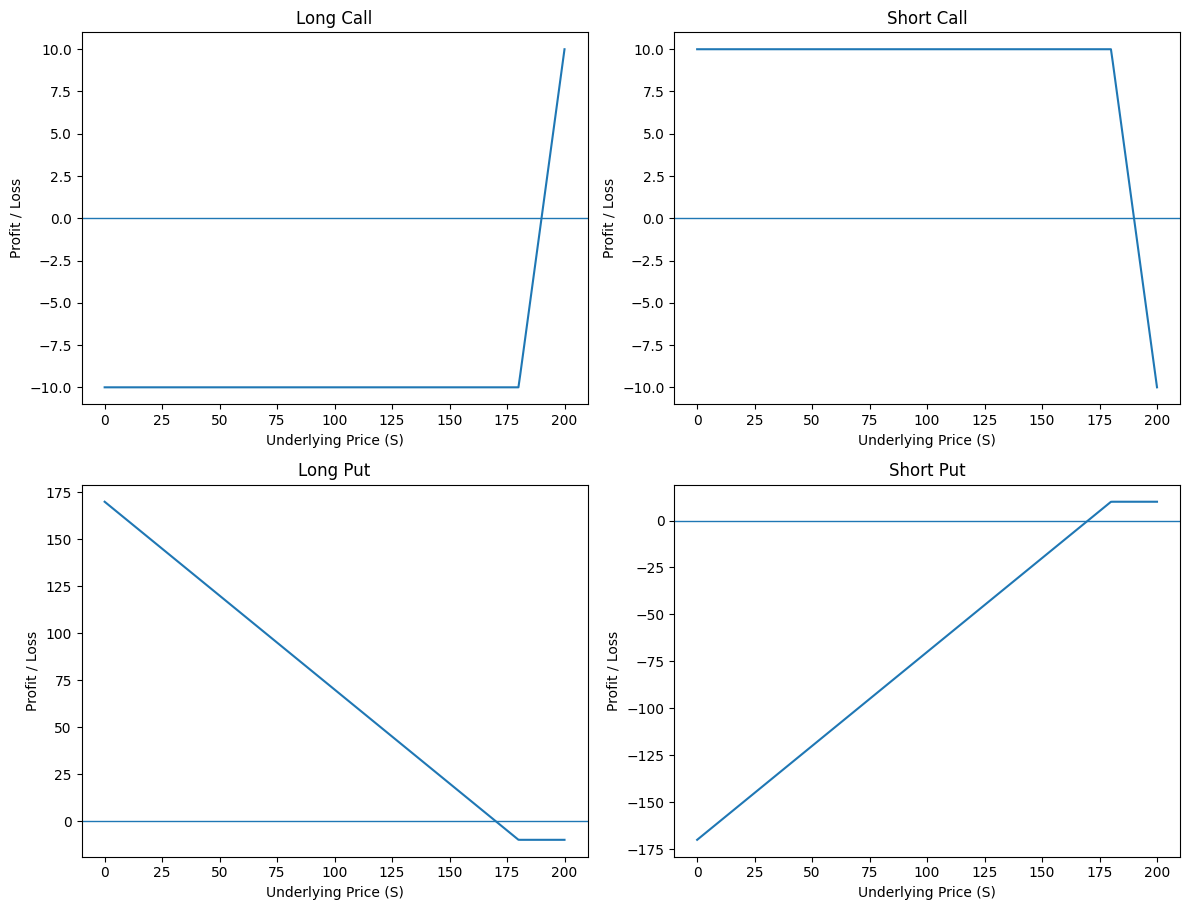

In [67]:
S = np.linspace(0, 200, 500)   # underlying price range
K = 180                        # strike price
premium_call = 10
premium_put = 10

# ---- PAYOFF FUNCTIONS ----
def long_call(S, K, premium):
    return np.maximum(S - K, 0) - premium

def short_call(S, K, premium):
    return premium - np.maximum(S - K, 0)

def long_put(S, K, premium):
    return np.maximum(K - S, 0) - premium

def short_put(S, K, premium):
    return premium - np.maximum(K - S, 0)

# ---- COMPUTE PAYOFFS ----
pay_long_call = long_call(S, K, premium_call)
pay_short_call = short_call(S, K, premium_call)
pay_long_put = long_put(S, K, premium_put)
pay_short_put = short_put(S, K, premium_put)

# ---- PLOTTING ----
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Long Call
axs[0, 0].plot(S, pay_long_call)
axs[0, 0].axhline(0, linewidth=1)
axs[0, 0].set_title("Long Call")
axs[0, 0].set_xlabel("Underlying Price (S)")
axs[0, 0].set_ylabel("Profit / Loss")

# Short Call
axs[0, 1].plot(S, pay_short_call)
axs[0, 1].axhline(0, linewidth=1)
axs[0, 1].set_title("Short Call")
axs[0, 1].set_xlabel("Underlying Price (S)")
axs[0, 1].set_ylabel("Profit / Loss")

# Long Put
axs[1, 0].plot(S, pay_long_put)
axs[1, 0].axhline(0, linewidth=1)
axs[1, 0].set_title("Long Put")
axs[1, 0].set_xlabel("Underlying Price (S)")
axs[1, 0].set_ylabel("Profit / Loss")

# Short Put
axs[1, 1].plot(S, pay_short_put)
axs[1, 1].axhline(0, linewidth=1)
axs[1, 1].set_title("Short Put")
axs[1, 1].set_xlabel("Underlying Price (S)")
axs[1, 1].set_ylabel("Profit / Loss")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [68]:
S = 205.55
T = 48/252
r = 0.0391

from collections import defaultdict

K = df["Strike"].tolist()

columns = ["Strike", "Steps", "Call_Price", "Call_Delta", "Call_Gamma",
           "Put_Price", "Put_Delta", "Put_Gamma", "Control_Variate"]
greeks_info  = pd.DataFrame(columns=columns)

for k in K:
    for n in range(2, 200):
        call_price, call_delta, call_gamma = binomial_option_pricing(S, k, 0, T, df.loc[df["Strike"] == k, "Feb_Calls_Implied_Vol"].values[0], n, option_type="call", american=True)

        black_put_price = black76(S, k, r, T, df.loc[df["Strike"] == k, "Feb_Puts_Implied_Vol"].values[0], option_type="put")
        euro_put_price, euro_put_delta, euro_put_gamma = binomial_option_pricing(S, k, 0, T, df.loc[df["Strike"] == k, "Feb_Puts_Implied_Vol"].values[0], n, option_type="put", american=False)
        amer_put_price, amer_put_delta, amer_put_gamma = binomial_option_pricing(S, k, 0, T, df.loc[df["Strike"] == k, "Feb_Puts_Implied_Vol"].values[0], n, option_type="put", american=True)
        control_variate = black_put_price - euro_put_price
        adjusted_amer_put_price = amer_put_price - control_variate
        greeks_info = pd.concat([
            greeks_info,
            pd.DataFrame([{
                "Strike": k,
                "Steps": n,
                "Call_Price": call_price,
                "Call_Delta": call_delta,
                "Call_Gamma": call_gamma,
                "Put_Price": adjusted_amer_put_price,
                "Put_Delta": amer_put_delta,
                "Put_Gamma": amer_put_gamma,
                "Control_Variate": control_variate
            }])
        ], ignore_index=True)

greeks_info

/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_28339/260591324.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  greeks_info = pd.concat([


,Strike,Steps,Call_Price,Call_Delta,Call_Gamma,Put_Price,Put_Delta,Put_Gamma,Control_Variate
0,186,2,23.518526,0.796492,0.011379,4.813514,-0.202846,0.011372,-0.869257
1,186,3,22.529260,0.811302,0.012834,2.853779,-0.188293,0.012841,0.110610
2,186,4,22.836971,0.810696,0.010969,3.447426,-0.188602,0.010980,-0.186213
3,186,5,22.886452,0.799462,0.011343,3.559507,-0.200015,0.011350,-0.242253
4,186,6,22.421201,0.815404,0.011267,2.614808,-0.183879,0.011284,0.230096
...,...,...,...,...,...,...,...,...,...
8113,226,195,2.108532,0.190476,0.012939,22.749155,-0.808207,0.012929,-0.162078
8114,226,196,2.120868,0.191057,0.012935,22.770396,-0.807705,0.012927,-0.172698
8115,226,197,2.106692,0.190397,0.012940,22.745689,-0.808281,0.012930,-0.160344
8116,226,198,2.120881,0.191057,0.012935,22.770655,-0.807699,0.012926,-0.172827


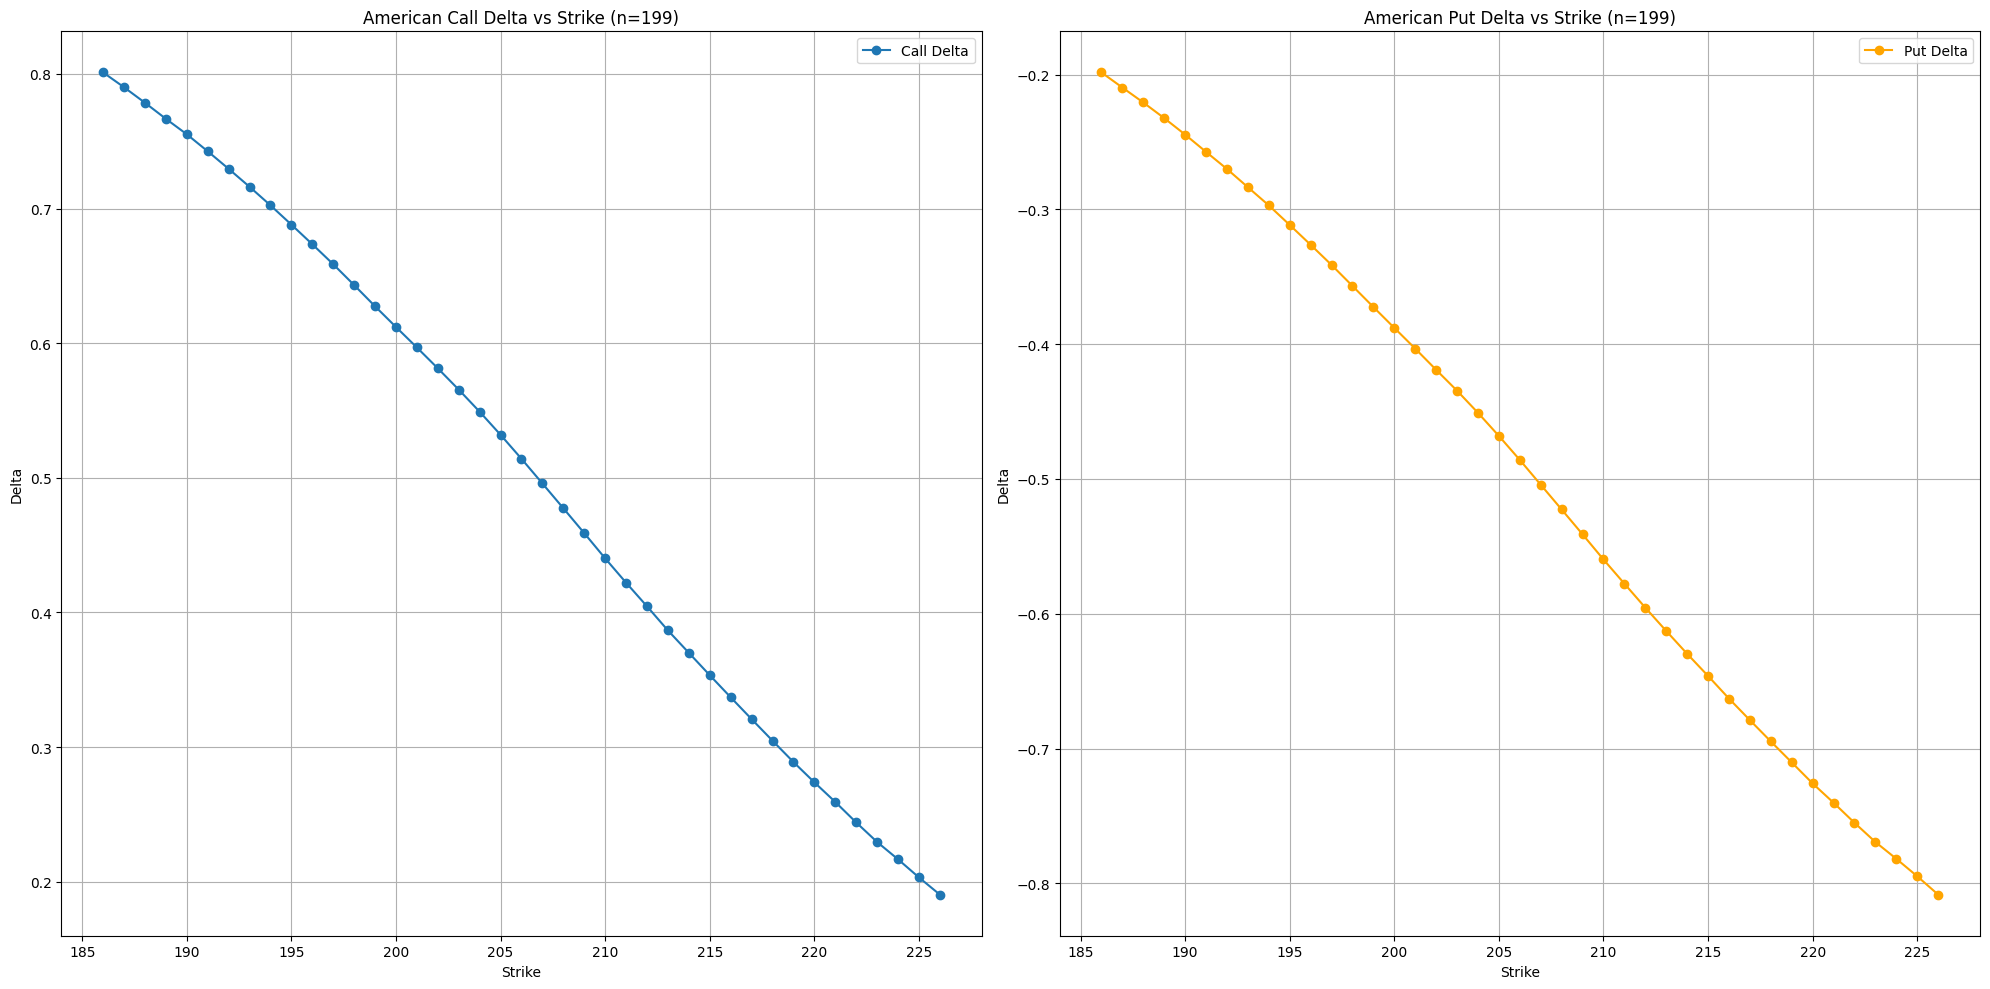

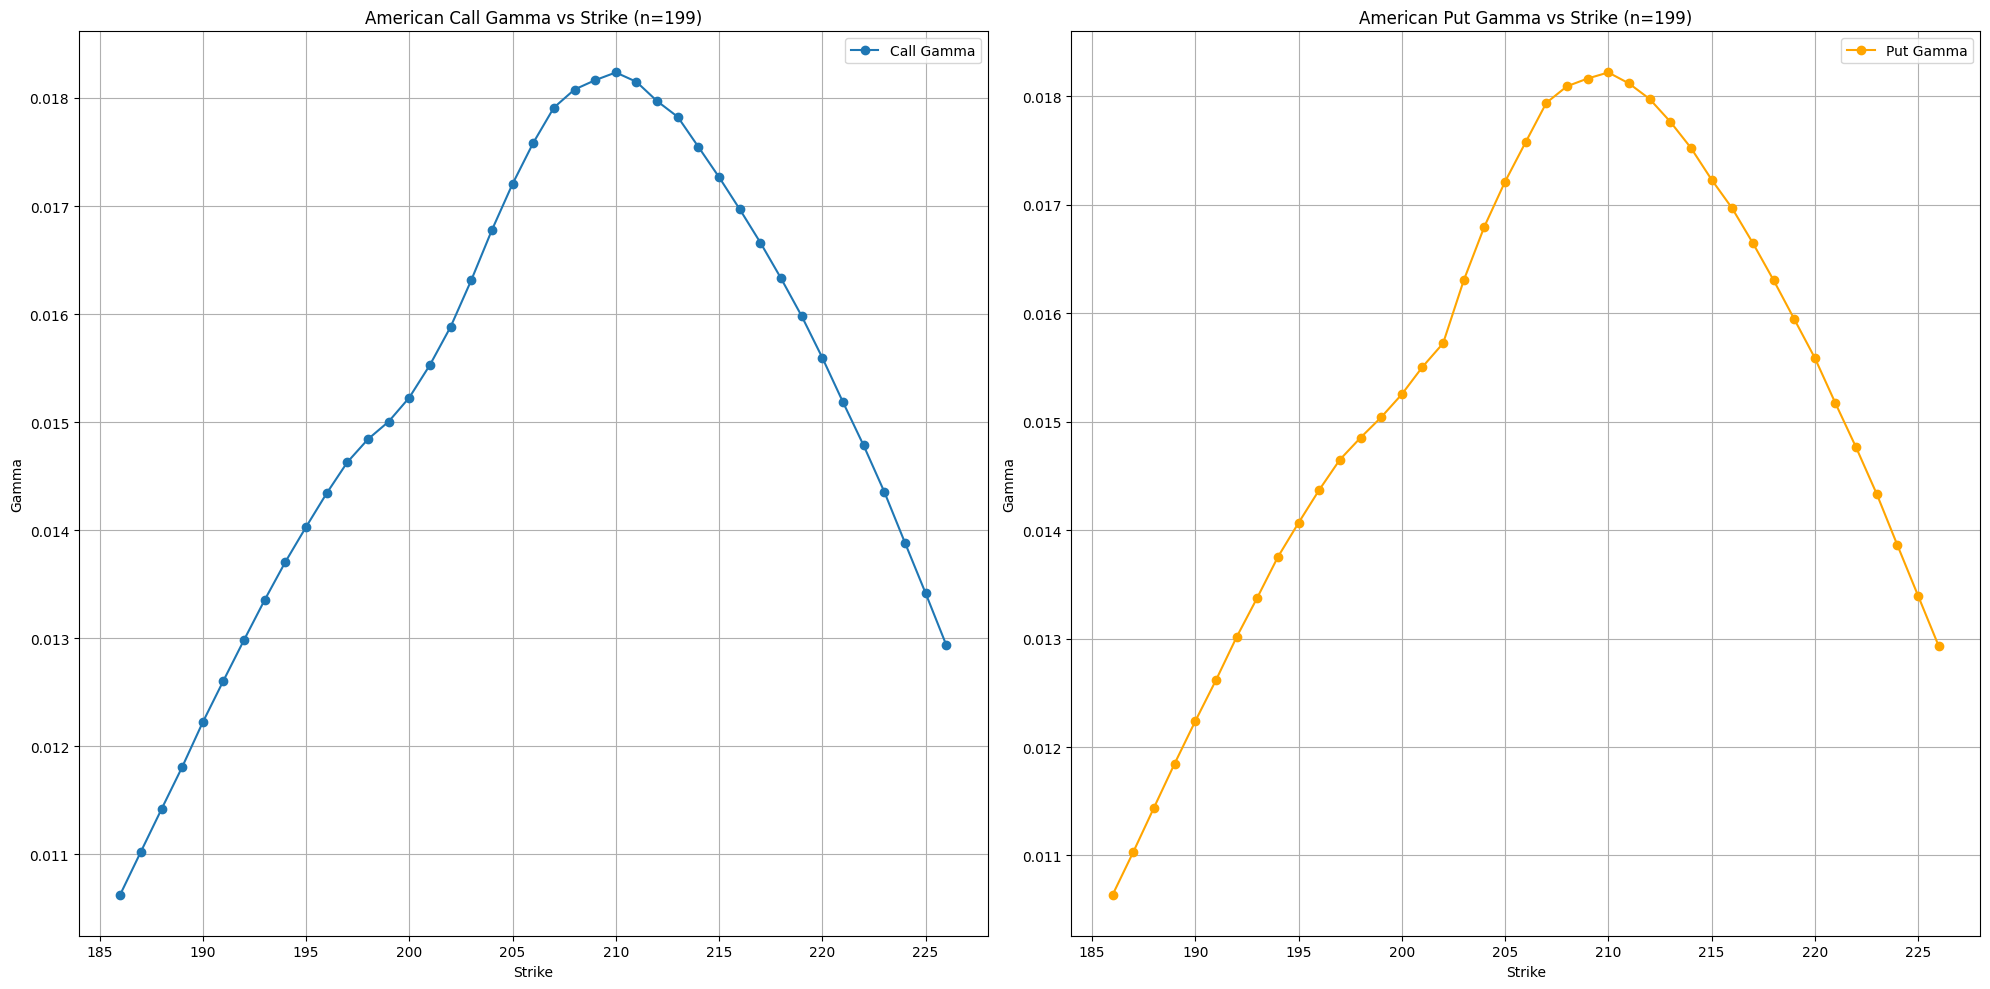

In [69]:
call_delta_df = greeks_info.pivot(index="Steps", columns="Strike", values="Call_Delta")
put_delta_df = greeks_info .pivot(index="Steps", columns="Strike", values="Put_Delta")
call_gamma_df = greeks_info.pivot(index="Steps", columns="Strike", values="Call_Gamma")
put_gamma_df = greeks_info.pivot(index="Steps", columns="Strike", values="Put_Gamma")

n_max = greeks_info["Steps"].max()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(K, [call_delta_df[k][n_max] for k in K], marker='o', label='Call Delta')
axes[0].set_title(f"American Call Delta vs Strike (n={n_max})")
axes[0].set_xlabel("Strike")
axes[0].set_ylabel("Delta")
axes[0].grid(True)
axes[0].legend()

axes[1].plot(K, [put_delta_df[k][n_max] for k in K], marker='o', color='orange', label='Put Delta')
axes[1].set_title(f"American Put Delta vs Strike (n={n_max})")
axes[1].set_xlabel("Strike")
axes[1].set_ylabel("Delta")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(K, [call_gamma_df[k][n_max] for k in K], marker='o', label='Call Gamma')
axes[0].set_title(f"American Call Gamma vs Strike (n={n_max})")
axes[0].set_xlabel("Strike")
axes[0].set_ylabel("Gamma")
axes[0].grid(True)
axes[0].legend()

axes[1].plot(K, [put_gamma_df[k][n_max] for k in K], marker='o', color='orange', label='Put Gamma')
axes[1].set_title(f"American Put Gamma vs Strike (n={n_max})")
axes[1].set_xlabel("Strike")
axes[1].set_ylabel("Gamma")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [88]:
# Hedging Dec maturity 220 call using current implied volatility
k = 220
sigma = df[df["Strike"] == 220]["Dec_Calls_Implied_Vol"].iloc[0]

hedge_exercise_df["TTM"] = np.linspace(18,9,10) / 252
hedge_exercise_df[["Call Price", "Delta", "Gamma"]] = hedge_exercise_df.apply(lambda row: (binomial_option_pricing(row["Last Price"], k, 0, row["TTM"], sigma, 200, american=True)), axis=1, result_type='expand')
hedge_exercise_df["Call Price Change"] = hedge_exercise_df["Call Price"].diff()
hedge_exercise_df["Price Change"] = hedge_exercise_df["Last Price"].diff()
hedge_exercise_df["Hedged Call Price Change"] = hedge_exercise_df["Call Price Change"] - hedge_exercise_df["Delta"].shift(1) * hedge_exercise_df["Price Change"]
hedge_exercise_df

/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_28339/1933197341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hedge_exercise_df["TTM"] = np.linspace(18,9,10) / 252
/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_28339/1933197341.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hedge_exercise_df[["Call Price", "Delta", "Gamma"]] = hedge_exercise_df.apply(lambda row: (binomial_option_pricing(row["Last Price"], k, 0, row["TTM"], sigma, 200, american=True)), axis=1, result_type='

,Last Price,Open Interest,SMAVG (15),Log Return,TTM,Call Price,Delta,Gamma,Call Price Change,Price Change,Hedged Call Price Change
Date,,,,,,,,,,,
2025-11-10,227.000,84902,77496.2656,0.032459,0.071429,10.843190,0.673801,0.020938,NaN,NaN,NaN
2025-11-11,226.400,90030,78417.8672,-0.002647,0.067460,10.272495,0.664611,0.021819,-0.570694,-0.600,-0.166414
2025-11-12,224.975,97353,79804.0000,-0.006314,0.063492,9.159449,0.636017,0.023327,-1.113047,-1.425,-0.165976
2025-11-13,218.950,104764,81661.9297,-0.027146,0.059524,5.574759,0.486391,0.026261,-3.584690,-6.025,0.247315
2025-11-14,219.525,108062,83678.2031,0.002623,0.055556,5.648000,0.500544,0.027148,0.073241,0.575,-0.206434
2025-11-17,221.775,109756,85913.3359,0.010197,0.051587,6.625047,0.562300,0.027565,0.977047,2.250,-0.149178
2025-11-18,220.850,111970,88360.9297,-0.004180,0.047619,5.902003,0.537107,0.029000,-0.723044,-0.925,-0.202917
2025-11-19,217.250,112995,90925.1328,-0.016435,0.043651,3.931639,0.427902,0.030417,-1.970363,-3.600,-0.036780
2025-11-20,215.400,114804,93606.6641,-0.008552,0.039683,2.965349,0.365294,0.030832,-0.966291,-1.850,-0.174672


In [ ]:
plt.plot(hedge_exercise_df["Last Price"])
plt.plot(hedge_exercise_df["Last Price"], )

,Last Price,Call Price
Date,,
2025-11-10,227.000,10.843190
2025-11-11,226.400,10.272495
2025-11-12,224.975,9.159449
2025-11-13,218.950,5.574759
2025-11-14,219.525,5.648000
2025-11-17,221.775,6.625047
2025-11-18,220.850,5.902003
2025-11-19,217.250,3.931639
2025-11-20,215.400,2.965349


In [99]:
print(hedge_exercise_df[["Last Price", "Call Price", "Delta", "Call Price Change", "Hedged Call Price Change"]].style.format({
    "Last Price": '{:.2f}',
    "Call Price": '{:.2f}',
    "Call Price Change": '{:.2f}',
    "Hedged Call Price Change": '{:.2f}',
    }).to_latex())

\begin{tabular}{lrrrrr}
 & Last Price & Call Price & Delta & Call Price Change & Hedged Call Price Change \\
Date &  &  &  &  &  \\
2025-11-10 00:00:00 & 227.00 & 10.84 & 0.673801 & nan & nan \\
2025-11-11 00:00:00 & 226.40 & 10.27 & 0.664611 & -0.57 & -0.17 \\
2025-11-12 00:00:00 & 224.97 & 9.16 & 0.636017 & -1.11 & -0.17 \\
2025-11-13 00:00:00 & 218.95 & 5.57 & 0.486391 & -3.58 & 0.25 \\
2025-11-14 00:00:00 & 219.53 & 5.65 & 0.500544 & 0.07 & -0.21 \\
2025-11-17 00:00:00 & 221.78 & 6.63 & 0.562300 & 0.98 & -0.15 \\
2025-11-18 00:00:00 & 220.85 & 5.90 & 0.537107 & -0.72 & -0.20 \\
2025-11-19 00:00:00 & 217.25 & 3.93 & 0.427902 & -1.97 & -0.04 \\
2025-11-20 00:00:00 & 215.40 & 2.97 & 0.365294 & -0.97 & -0.17 \\
2025-11-21 00:00:00 & 214.78 & 2.51 & 0.337099 & -0.46 & -0.23 \\
\end{tabular}



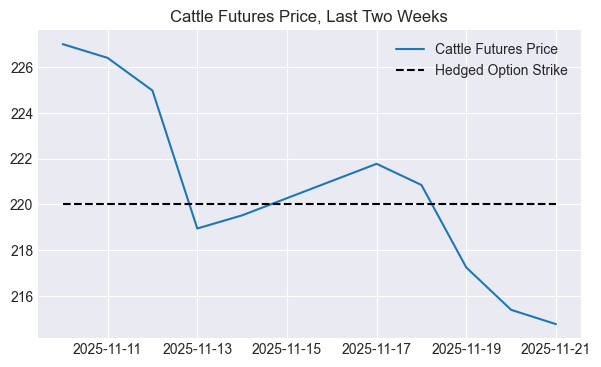

In [103]:
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(7,4))
plt.plot(hedge_exercise_df["Last Price"], label="Cattle Futures Price")
plt.plot(hedge_exercise_df.index, np.ones(len(hedge_exercise_df)) * 220, "k--", label="Hedged Option Strike")
plt.legend()
plt.title("Cattle Futures Price, Last Two Weeks")
plt.show()